In [442]:
import pandas as pd
import numpy as np

In [443]:
data = pd.read_csv("dataset_of_spam.csv")

In [444]:
data.sample(5)

,Category,Message
4058,ham,Noice. Text me when you're here
4,ham,"Nah I don't think he goes to usf, he lives aro..."
2649,ham,"Hi, can i please get a &lt;#&gt; dollar loan..."
3028,ham,You still at the game?
2637,ham,Thank god they are in bed!


In [445]:
data.shape

(5572, 2)

In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [447]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [448]:
data['Category']= encoder.fit_transform(data['Category'])

In [449]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [450]:
# check for missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [451]:
# check for duplicate values
data.duplicated().sum()

np.int64(415)

In [452]:
duplicates = data[data.duplicated()]
print(duplicates)

      Category                                            Message
103          0  As per your request 'Melle Melle (Oru Minnamin...
154          0  As per your request 'Melle Melle (Oru Minnamin...
207          0  As I entered my cabin my PA said, '' Happy B'd...
223          0                             Sorry, I'll call later
326          0                   No calls..messages..missed calls
...        ...                                                ...
5524         1  You are awarded a SiPix Digital Camera! call 0...
5535         0  I know you are thinkin malaria. But relax, chi...
5539         0                         Just sleeping..and surfing
5553         0                        Hahaha..use your brain dear
5558         0                             Sorry, I'll call later

[415 rows x 2 columns]


In [453]:
data =data.drop_duplicates(keep='first')

In [454]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Category, Message]
Index: []


In [455]:
data.shape

(5157, 2)

In [456]:
data.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [457]:
data['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

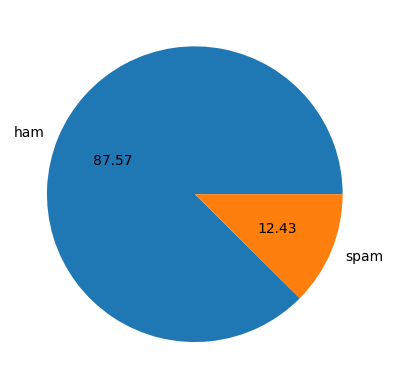

In [458]:
import matplotlib.pyplot as plt
plt.pie(data['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [459]:
import nltk

In [460]:
data['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5157, dtype: int64

In [461]:
data['num_characters'] = data['Message'].apply(len)

In [462]:
data.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [463]:
# number of words
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [464]:
data.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [465]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [466]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [467]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [468]:
# ham messeages
data[data['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [469]:
# spam messages
data[data['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [470]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

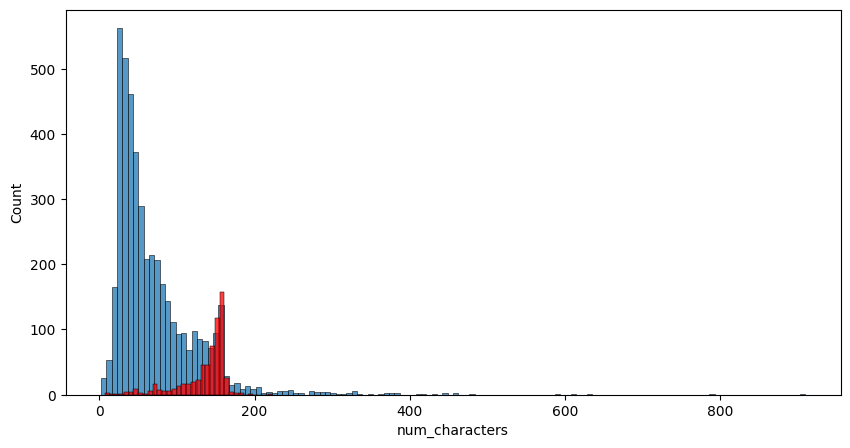

In [471]:
plt.figure(figsize = (10,5))
sns.histplot(data[data['Category'] == 0]['num_characters'])
sns.histplot(data[data['Category'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

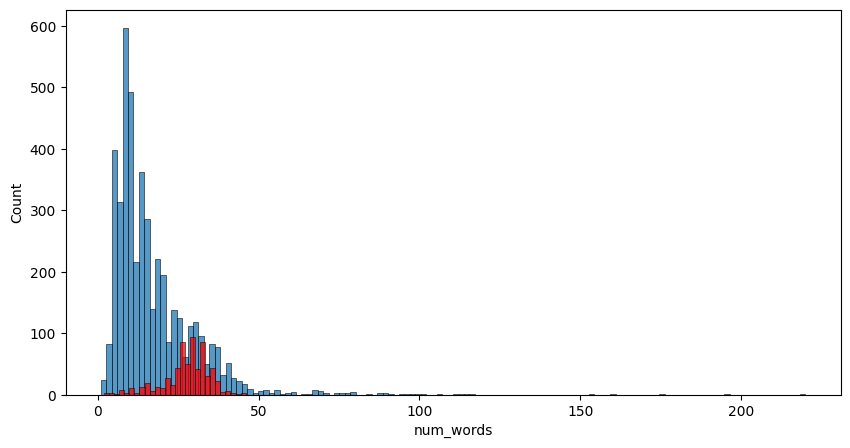

In [472]:
plt.figure(figsize = (10,5))
sns.histplot(data[data['Category'] == 0]['num_words'])
sns.histplot(data[data['Category'] == 1]['num_words'], color='red')

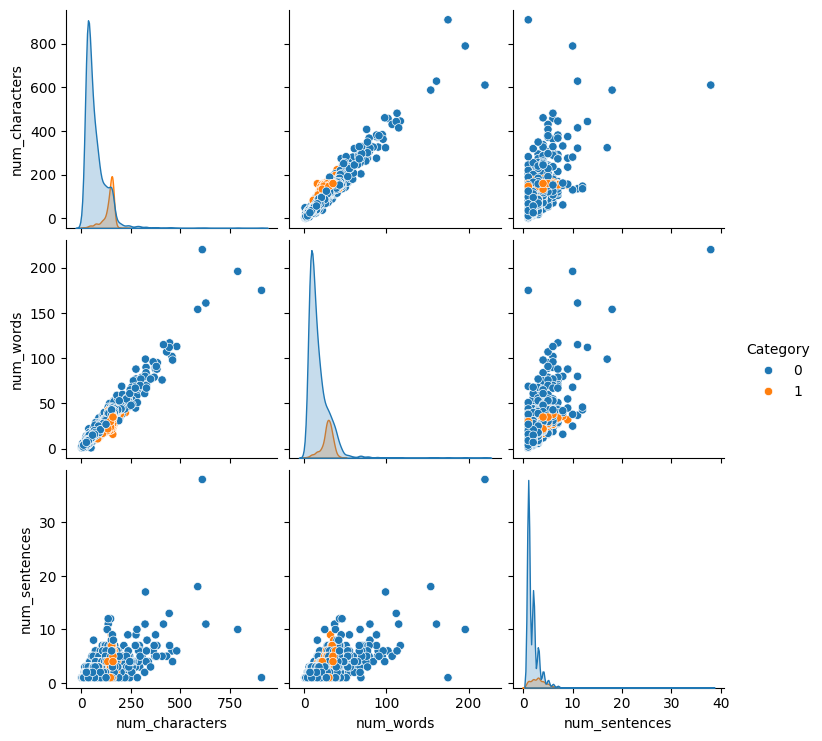

In [473]:
sns.pairplot(data,hue='Category')

In [474]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [475]:
def transform_text(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
            
    Message = y[:]
    y.clear()

    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Message = y[:]
    y.clear()

    for i in Message:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [476]:
transform_text("Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol")

'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol'

In [477]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('Walking')

'walk'

In [478]:
data['Message'][25]

"Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol"

In [479]:
data['transformed_Message'] = data['Message'].apply(transform_text)

In [480]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [481]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'black')

In [482]:
spam_wc = wc.generate(data[data['Category'] == 1]['transformed_Message'].str.cat(sep=" "))

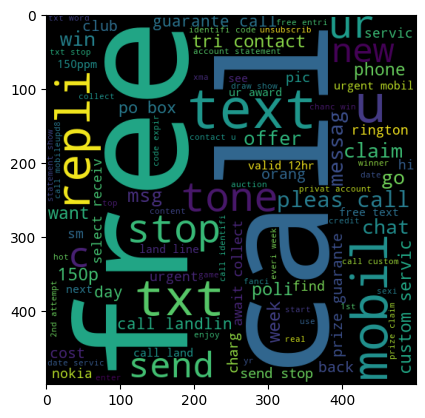

In [483]:
plt.imshow(spam_wc)

In [484]:
ham_wc = wc.generate(data[data['Category'] == 0]['transformed_Message'].str.cat(sep=" "))

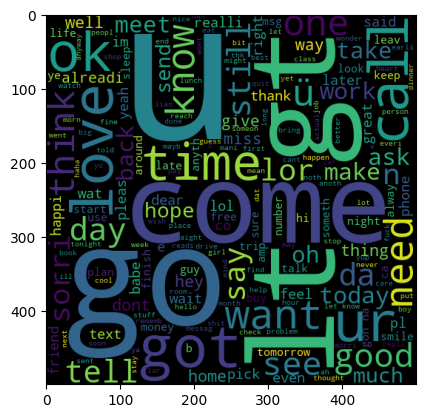

In [485]:
plt.imshow(ham_wc)

In [486]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [487]:
spam_corpus = []
for msg in data[data['Category'] == 1]['transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [488]:
len(spam_corpus)

9781

In [489]:
ham_corpus = []
for msg in data[data['Category'] == 0]['transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [490]:
len(ham_corpus)

35940

MODEL BUILDING

In [491]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [492]:
X = cv.fit_transform(data['transformed_Message']).toarray()

In [493]:
X.shape

(5157, 6781)

In [494]:
y = data['Category'].values

In [495]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [496]:
from sklearn.model_selection import train_test_split

In [497]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [498]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [499]:
model = MultinomialNB()

In [500]:
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796511627906976
[[895  10]
 [ 11 116]]
0.9206349206349206


In [501]:
model.score(X_train,y_train)

0.991030303030303

In [502]:
model.score(X_test,y_test)

0.9796511627906976

In [503]:
import pickle
pickle.dump(model, open('spam07.pkl','wb'))

In [504]:
import pickle
pickle.dump(cv, open('vec07.pkl','wb'))